<a href="https://colab.research.google.com/github/limyeekiatt/DSL/blob/Homework/VerilogGitHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Homework

Copy this ipynb to your Github and link to Google Colab for Verilog HDL simulation.

Submit the copy of ipynb with complete solution to the DSL Edimension: Homework Submission.

# Q1-Decade Counter

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the decade_counter as shown below using if-else statements.
3. Submit this file to DSL edimension for assessment;
4. The specification of the decade_counter are:
  - When "rst" is high, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is low, the circuit increments on every positive edge of the clk.
  - The highest count that can be reached is 4'b1001, after which the count will restart from 4'b0000 again.
  - Only when the count is 4'b1001, the output ten is set to ‘1’ else the output ten will always be set to ‘0’.

5. Write a Verilog test stimulus module for the decade_counter and verify its proper operation as follows:
  - Create a clock (Period: 20 unit time);
  - Test for reset active;
  - Then test for the counting for 1 complete count cycles ie: counting from 4'b0000 to 4'b1001;
  - Use Weveform Viewer for viewing the inputs and outputs;
  - Here is Verilog code template.

In [19]:
%%verilog

module decade_counter(
    input clk,
    input rst,
    output [3:0] count,
    output ten
);

reg[3:0] count_reg;
reg ten_reg;

assign count = count_reg;
assign ten = ten_reg;

always@(posedge clk or posedge rst) begin

  if (rst) begin
    count_reg <= 4'b0000;
    ten_reg <= 0;
  end

  else if (count_reg == 4'b1001) begin
    count_reg <= 4'b0000;
    ten_reg<= 1;
  end

  else begin
    count_reg <= count_reg + 4'b0001;
  end

end

endmodule

module decade_counter_tb;

reg clk;
reg rst;
wire [3:0] count;
wire ten;

decade_counter decade_counter_u0(
  .clk(clk),
  .rst(rst),
  .count(count),
  .ten(ten)
);

always begin

  #1 clk = ~clk;

end

initial begin
  $dumpfile("waveform.vcd");
  $dumpvars;
  clk = 0;
  rst = 1;

  #1 rst = 0;
  #20 $finish;
  $dumpoff;

end

endmodule

VCD info: dumpfile waveform.vcd opened for output.



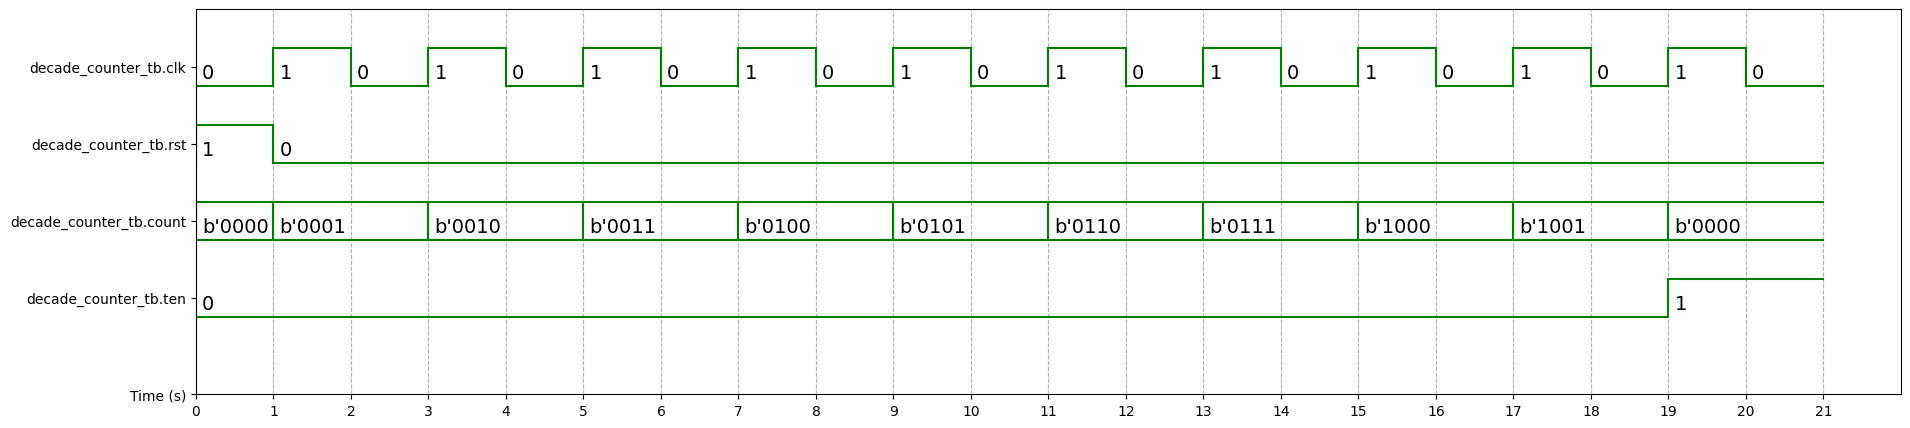

In [20]:
%%waveform waveform.vcd
sign_list = ['decade_counter_tb.clk','decade_counter_tb.rst','decade_counter_tb.count','decade_counter_tb.ten']
time_begin = 0
time_end = 21
base = 'bin' # bin, dec, dec2, hex, octal

6. The following figure is the test results for reference only. Your results maybe cover more test case if required.

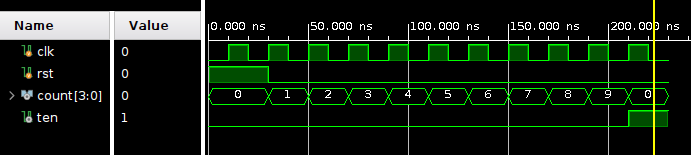

# Q2-Multiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the multiplexer as shown below using case statements.
3. The specifications of the multiplexer are:
  - The circuit is a 4-to-1 multiplexer;
  - The inputs A, B, C, D and output X are all 2-bit vectors;
  - Output X will be equal to either one of the 4 inputs depending on the 4 combinations of 2-bits signal SEL. The following True-table details the relationship between SEL and output X;

| SEL   | OUTPUT X |
|-------|----------|
| 2'b00 | A        |
| 2'b01 | B        |
| 2'b10 | C        |
| 2'b11 | D        |


4. Write a Verilog test stimulus module for the multiplexer;


In [23]:
%%verilog

module multiplexer(
  input [1:0]A,
  input [1:0]B,
  input [1:0]C,
  input [1:0]D,
  input [1:0]SEL,
  output [1:0]X
);

reg [1:0]X_reg;
assign X = X_reg;

always @(SEL) begin
  case(SEL)
    2'b00: X_reg = A;
    2'b01: X_reg = B;
    2'b10: X_reg = C;
    2'b11: X_reg = D;
  endcase
end

endmodule

module multiplexer_tb();
reg [1:0]A;
reg [1:0]B;
reg [1:0]C;
reg [1:0]D;
reg [1:0]SEL;
wire [1:0]X;

multiplexer multiplexer_u0(
    .A(A),
    .B(B),
    .C(C),
    .D(D),
    .SEL(SEL),
    .X(X)
);


initial begin
  $dumpfile("waveform.vcd");
  $dumpvars(0,multiplexer_tb);
  A = 0;
  B = 1;
  C = 1;
  D = 3;

  SEL = 2'b00;
  #1 SEL = 2'b01;
  #1 SEL = 2'b10;
  #1 SEL = 2'b11;
  #1 $finish;

  $dumpoff;
end

endmodule


VCD info: dumpfile waveform.vcd opened for output.



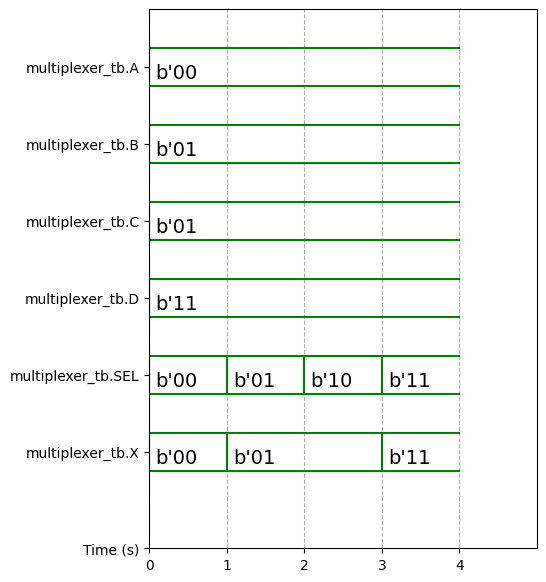

In [27]:
%%waveform waveform.vcd
sign_list = ['multiplexer_tb.A','multiplexer_tb.B','multiplexer_tb.C','multiplexer_tb.D','multiplexer_tb.SEL','multiplexer_tb.X']
time_begin = 0
time_end = 4
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the multiplexer;

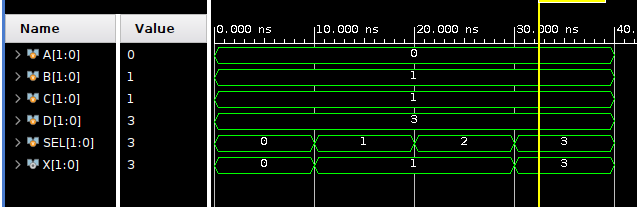

# Q3-Demultiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the demultiplexer as shown below using case statements. Saved the Verilog description as q3_xxxxxxx.v, and q3_tb_xxxxxxx.v;
3. The specifications of the demultiplexer are:
  - It is a 1-to-4 demultiplexer.
  - Input A and outputs W, X, Y, and Z are all 2-bit vectors.
  - SEL is a 2-bit select input.
  - Each of the 4 combinations of SEL will determine which of the 4 outputs will receive the value of input A.
  - When one output is equal to A, all other outputs are equal to ‘0’.

| SEL   | OUTPUT W | OUTPUT X | OUTPUT Y | OUTPUT Z |
|-------|----------|----------|----------|----------|
| 2'b00 | A        | 2'b00    | 2'b00    | 2'b00    |
| 2'b01 | 2'b00    | A        | 2'b00    | 2'b00    |
| 2'b10 | 2'b00    | 2'b00    | A        | 2'b00    |
| 2'b11 | 2'b00    | 2'b00    | 2'b00    | A        |


4. Write a Verilog test stimulus module for the demultiplexer;





In [28]:
%%verilog

module demultiplexer(
  input [1:0]A,
  input [1:0]SEL,
  output [1:0]W,
  output [1:0]X,
  output [1:0]Y,
  output [1:0]Z
);

reg [1:0]W_reg;
reg [1:0]X_reg;
reg [1:0]Y_reg;
reg [1:0]Z_reg;

assign W = W_reg;
assign X = X_reg;
assign Y = Y_reg;
assign Z = Z_reg;

always @(SEL or A) begin
  case (SEL)
    2'b00: begin W_reg = A; X_reg = 2'b00; Y_reg = 2'b00; Z_reg = 2'b00; end
    2'b01: begin W_reg = 2'b00; X_reg = A; Y_reg = 2'b00; Z_reg = 2'b00; end
    2'b10: begin W_reg = 2'b00; X_reg = 2'b00; Y_reg = A; Z_reg = 2'b00; end
    2'b11: begin W_reg = 2'b00; X_reg = 2'b00; Y_reg = 2'b00; Z_reg = A; end
  endcase
end

endmodule

module demultiplexer_tb();

reg [1:0]A;
reg [1:0]SEL;
wire [1:0]W;
wire [1:0]X;
wire [1:0]Y;
wire [1:0]Z;

demultiplexer demultiplexer_u0(
  .A(A),
  .SEL(SEL),
  .W(W),
  .X(X),
  .Y(Y),
  .Z(Z)
);

initial begin
  $dumpfile("tb.vcd");
  $dumpvars(0,demultiplexer_tb);
  A = 2'b00;
  SEL = 2'b00;

  #1 SEL = 2'b01; A = 2'b01;
  #1 SEL = 2'b10;
  #1 SEL = 2'b11; A = 2'b11;
  #1 $finish;

  $dumpoff;
end

endmodule


VCD info: dumpfile tb.vcd opened for output.



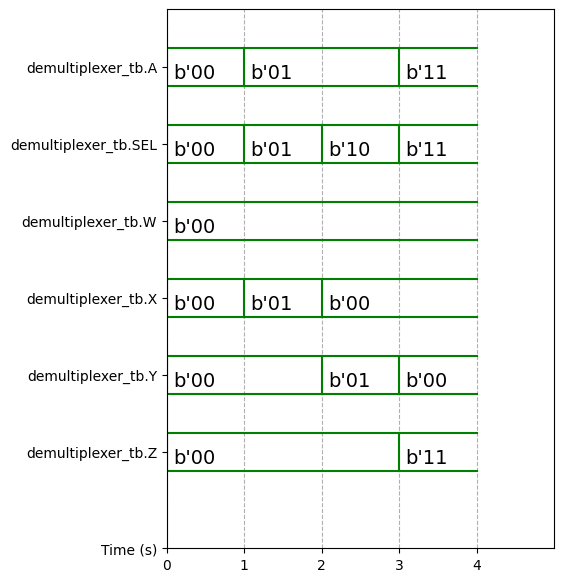

In [29]:
%%waveform tb.vcd
sign_list = ['demultiplexer_tb.A','demultiplexer_tb.SEL','demultiplexer_tb.W','demultiplexer_tb.X','demultiplexer_tb.Y','demultiplexer_tb.Z']
time_begin = 0
time_end = 4
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the demultiplexer;

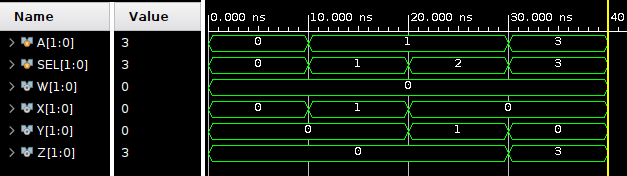

# Q4-Nibbleadd

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the nibbleadd.
3. The specifications for this module nibbleadd are:
  - Inputs A and B are both 8-bit vector inputs. Output q is 5-bit wide.
  - When ctrl input is ‘0’, output is the sum of lowest 4 bits of A and B.
  - When ctrl input is ‘1’, output is the sum of upper 4 bits of A and B.
  - Here is Verilog code template. You have to copy the template into your source file.

4. Write a Verilog test stimulus module for the nibbleadd;

In [30]:
%%verilog

module nibbleadd(
  input [7:0]A,
  input [7:0]B,
  input ctrl,
  output [4:0]q
);

reg [4:0]q_reg;

assign q = q_reg;

always @(ctrl) begin
  case(ctrl)
    0: q_reg <= A[3:0] + B[3:0];
    1: q_reg <= A[7:4] + B[7:4];
  endcase
end

endmodule

module nibbleadd_tb();

reg [7:0]A;
reg [7:0]B;
reg ctrl;
wire [4:0]q;

nibbleadd nibbleadd_u0(
  .A(A),
  .B(B),
  .ctrl(ctrl),
  .q(q)
);

initial begin
  $dumpfile("tb.vcd");
  $dumpvars(0,nibbleadd_tb);
  A = 8'b11110010;
  B = 8'b11001110;
  ctrl = 0;

  #5 ctrl = 1;

  #5 $finish;

  $dumpoff;

end
endmodule


VCD info: dumpfile tb.vcd opened for output.



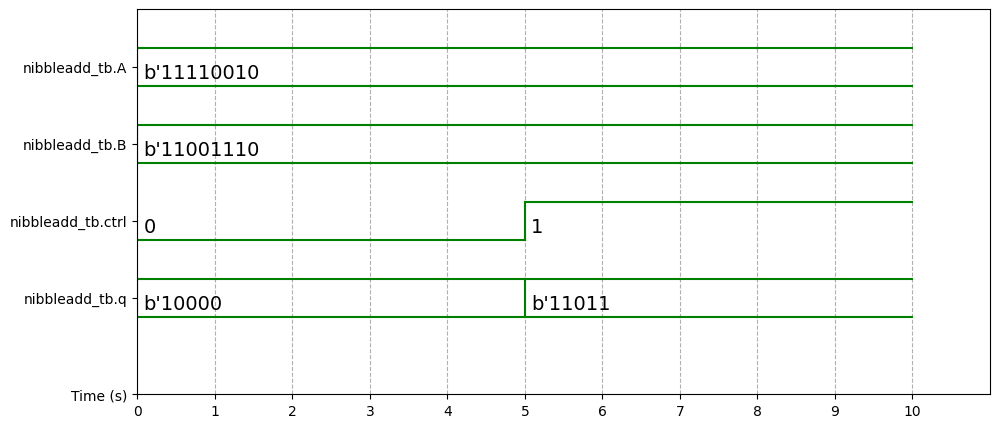

In [31]:
%%waveform tb.vcd
sign_list = ['nibbleadd_tb.A','nibbleadd_tb.B','nibbleadd_tb.ctrl','nibbleadd_tb.q']
time_begin = 0
time_end = 10
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the nibbleadd;

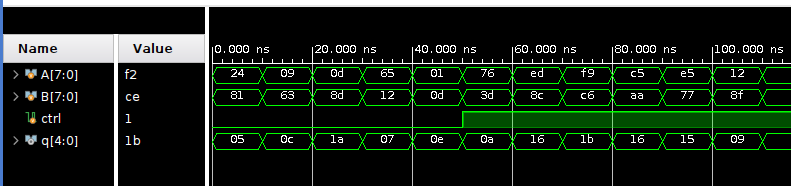

# Q5-CCTA

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the CCTA.
3. The specifications for this module CCTA are:
  - Inputs A, B and C are 4-bit vector inputs.
  - Output q is 5-bit wide.
  - rst is active high, when activated q is set to 0;
  - When ctrl input is ‘0’, output q is the sum of A and B.
  - When ctrl input is ‘1’, output q is the difference of A and C.

4. Write a Verilog test stimulus module for the CCTA;

In [38]:
%%verilog

module CCTA(
  input [3:0] A,
  input [3:0] B,
  input [3:0] C,
  input rst,
  input ctrl,
  output [4:0] q
);

reg [4:0] q_reg;

assign q = q_reg;


always @(rst or ctrl) begin
  if (rst)
    q_reg = 4'b0000;

  else
    if (ctrl)
      if (A>C)
        q_reg = A - C;
      else
        q_reg = C - A;

  else
    q_reg = A + B;
end
endmodule

module CCTA_tb();

reg [3:0] A;
reg [3:0] B;
reg [3:0] C;
reg rst;
reg ctrl;
wire [4:0] q;

CCTA CCTA_u0(
  .A(A),
  .B(B),
  .C(C),
  .rst(rst),
  .ctrl(ctrl),
  .q(q)
);

initial begin
  $dumpfile("tb.vcd");
  $dumpvars(0,CCTA_tb);
  A = 4'b0100;
  B = 4'b0001;
  C = 4'b1001;
  ctrl = 0;
  rst = 1;

  #1 rst = 0;
  #4 ctrl = 1;
  #5 $finish;

  $dumpoff;

end

endmodule


VCD info: dumpfile tb.vcd opened for output.



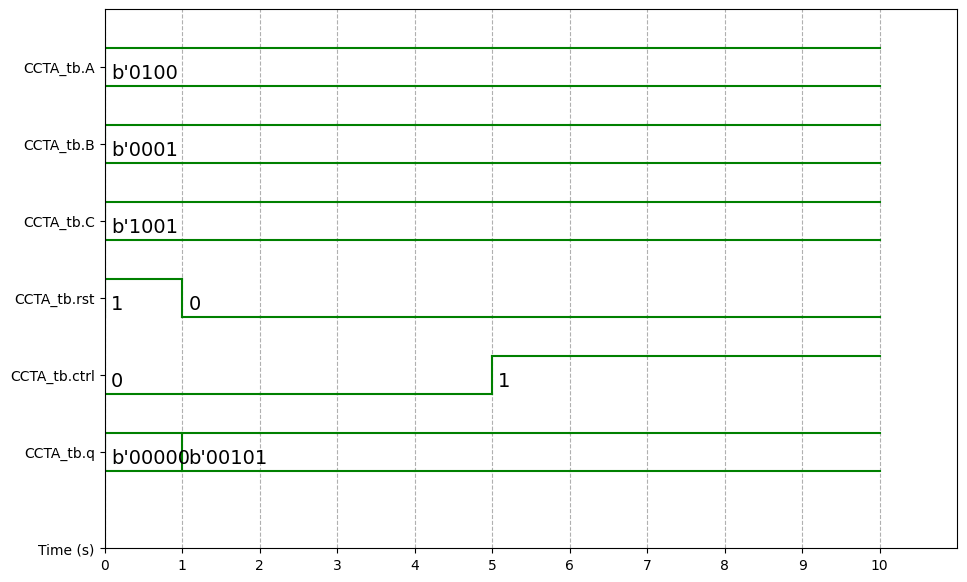

In [39]:
%%waveform tb.vcd
sign_list = ['CCTA_tb.A','CCTA_tb.B','CCTA_tb.C','CCTA_tb.rst','CCTA_tb.ctrl','CCTA_tb.q']
time_begin = 0
time_end = 10
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the CCTA;

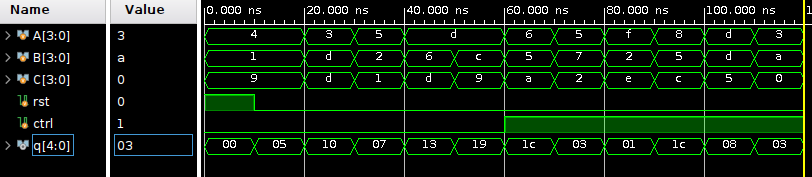